In [1]:
import os
os.environ["TQDM_DISABLE"] = "1"

import tqdm
from tqdm import tqdm as tqdm_class

_original_init = tqdm_class.__init__
def _patched_init(self, *args, **kwargs):
    kwargs["disable"] = True
    _original_init(self, *args, **kwargs)
tqdm_class.__init__ = _patched_init
tqdm.tqdm = tqdm_class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import sys
import time
import logging
logging.getLogger("anomalib").setLevel(logging.ERROR)
warnings.filterwarnings('ignore')

from tqdm import tqdm
from pathlib import Path
from collections import Counter, defaultdict
from PIL import Image

In [2]:
try:
    import google.colab
    from google.colab import drive
    !uv pip install anomalib
    !uv pip install open-clip-torch
    drive.mount('/content/drive', force_remount=True)
    PROJECT_ROOT = Path('/content/drive/Othercomputers/Mac/multiModal_anomaly_report') # 본인 경로 수정: Mac/Window
except ImportError:
    PROJECT_ROOT = Path.cwd().parents[1]

os.chdir(PROJECT_ROOT) # 현재 경로 수정
print(f"Current working directory: {os.getcwd()}")

Using Python 3.12.12 environment at: /usr
Audited 1 package in 110ms
Using Python 3.12.12 environment at: /usr
Audited 1 package in 96ms
Mounted at /content/drive
Current working directory: /content/drive/Othercomputers/Mac/multiModal_anomaly_report


### Check config

In [3]:
# TODO: PATH 설정

# dataset path
DATA_ROOT = PROJECT_ROOT / "dataset" / "MMAD"

# config.yaml path
CONFIG_ROOT = PROJECT_ROOT / "configs"
RUNTIME_CONFIG_ROOT = CONFIG_ROOT / "runtime.yaml"
EVAL_CONFIG_ROOT = CONFIG_ROOT / "eval.yaml"

# output path
OUTPUT_ROOT = PROJECT_ROOT / "output"

# check (선택사항)
print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Root: {DATA_ROOT}")
print(f"Config Root: {RUNTIME_CONFIG_ROOT}")

Project Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report
Data Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report/dataset/MMAD
Config Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report/configs/runtime.yaml


In [4]:
from src.utils import load_config, load_json, load_csv

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"

# TODO: runtime_config.yaml 확장/수정
config = load_config(RUNTIME_CONFIG_ROOT)
config

{'data': {'root': 'dataset/MMAD', 'output_root': './output'},
 'anomaly': {'model': 'patchcore',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': None},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'training': {'resume': False,
  'train_batch_size': None,
  'eval_batch_size': None,
  'num_workers': 0,
  'max_epochs': None},
 'engine': {'accelerator': 'auto',
  'enable_progress_bar': False,
  'logger': 'wandb'},
 'wandb': {'project': 'Anomaly_Detection'},
 'output': {'save_json': True}}

### Train

In [ ]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
runner.fit_all()

TrainAnomalib - INFO - Initialized - model: patchcore, device: cuda
TrainAnomalib - INFO - Starting fit_all: 11 categories
TrainAnomalib - INFO - [1/11] Training: GoodsAD/cigarette_box...
TrainAnomalib - INFO - Fitting patchcore - GoodsAD/cigarette_box
TrainAnomalib - INFO - Resume is false. Deleting old directory to start fresh: output/Patchcore/GoodsAD/cigarette_box


Device: Tesla T4

[1/11] Training: GoodsAD/cigarette_box...


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: [wandb.login()] Using explicit session credentials for https://api.wandb.ai.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: moonstalker9010 (moonstalker9010-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
wandb: WARNING The anonymous setting has no eff

wandb: Detected [openai] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

### Predict

In [ ]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
predictions

TrainAnomalib - INFO - Initialized - model: efficientad, device: mps
TrainAnomalib - INFO - Starting predict_all: 11 trained categories
TrainAnomalib - INFO - Predicting efficientad - GoodsAD/cigarette_box
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/cigarette_box/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/cigarette_box/v0/model.ckpt


Device: mps

[1/11] Inference: cigarette_box...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/GoodsAD/cigarette_box/predictions.json
TrainAnomalib - INFO - Predicting GoodsAD/cigarette_box done - 14 batches
TrainAnomalib - INFO - Predicting efficientad - GoodsAD/drink_bottle
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/drink_bottle/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/drink_bottle/v0/model.ckpt


✓ [1/11] cigarette_box 완료 (145.7s)

[2/11] Inference: drink_bottle...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/GoodsAD/drink_bottle/predictions.json
TrainAnomalib - INFO - Predicting GoodsAD/drink_bottle done - 25 batches
TrainAnomalib - INFO - Predicting efficientad - GoodsAD/drink_can
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/drink_can/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/drink_can/v0/model.ckpt


✓ [2/11] drink_bottle 완료 (255.4s)

[3/11] Inference: drink_can...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/GoodsAD/drink_can/predictions.json
TrainAnomalib - INFO - Predicting GoodsAD/drink_can done - 10 batches
TrainAnomalib - INFO - Predicting efficientad - GoodsAD/food_bottle
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/food_bottle/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/food_bottle/v0/model.ckpt


✓ [3/11] drink_can 완료 (93.3s)

[4/11] Inference: food_bottle...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/GoodsAD/food_bottle/predictions.json
TrainAnomalib - INFO - Predicting GoodsAD/food_bottle done - 19 batches
TrainAnomalib - INFO - Predicting efficientad - GoodsAD/food_box
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/food_box/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/food_box/v0/model.ckpt


✓ [4/11] food_bottle 완료 (163.0s)

[5/11] Inference: food_box...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/GoodsAD/food_box/predictions.json
TrainAnomalib - INFO - Predicting GoodsAD/food_box done - 13 batches
TrainAnomalib - INFO - Predicting efficientad - GoodsAD/food_package
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/food_package/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/GoodsAD/food_package/v0/model.ckpt


✓ [5/11] food_box 완료 (112.4s)

[6/11] Inference: food_package...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/GoodsAD/food_package/predictions.json
TrainAnomalib - INFO - Predicting GoodsAD/food_package done - 16 batches
TrainAnomalib - INFO - Predicting efficientad - MVTec-LOCO/breakfast_box
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/breakfast_box/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/breakfast_box/v0/model.ckpt


✓ [6/11] food_package 완료 (163.9s)

[7/11] Inference: breakfast_box...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/MVTec-LOCO/breakfast_box/predictions.json
TrainAnomalib - INFO - Predicting MVTec-LOCO/breakfast_box done - 9 batches
TrainAnomalib - INFO - Predicting efficientad - MVTec-LOCO/juice_bottle
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/juice_bottle/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/juice_bottle/v0/model.ckpt


✓ [7/11] breakfast_box 완료 (64.4s)

[8/11] Inference: juice_bottle...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/MVTec-LOCO/juice_bottle/predictions.json
TrainAnomalib - INFO - Predicting MVTec-LOCO/juice_bottle done - 11 batches
TrainAnomalib - INFO - Predicting efficientad - MVTec-LOCO/pushpins
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/pushpins/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/pushpins/v0/model.ckpt


✓ [8/11] juice_bottle 완료 (63.0s)

[9/11] Inference: pushpins...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/MVTec-LOCO/pushpins/predictions.json
TrainAnomalib - INFO - Predicting MVTec-LOCO/pushpins done - 10 batches
TrainAnomalib - INFO - Predicting efficientad - MVTec-LOCO/screw_bag
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/screw_bag/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/screw_bag/v0/model.ckpt


✓ [9/11] pushpins 완료 (63.1s)

[10/11] Inference: screw_bag...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/MVTec-LOCO/screw_bag/predictions.json
TrainAnomalib - INFO - Predicting MVTec-LOCO/screw_bag done - 11 batches
TrainAnomalib - INFO - Predicting efficientad - MVTec-LOCO/splicing_connectors
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
Restoring states from the checkpoint path at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/splicing_connectors/v0/model.ckpt
Loaded model weights from the checkpoint at /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report/output/EfficientAd/MVTec-LOCO/splicing_connectors/v0/model.ckpt


✓ [10/11] screw_bag 완료 (69.0s)

[11/11] Inference: splicing_connectors...


TrainAnomalib - INFO - Saved predictions JSON: output/predictions/efficientad/MVTec-LOCO/splicing_connectors/predictions.json
TrainAnomalib - INFO - Predicting MVTec-LOCO/splicing_connectors done - 10 batches
TrainAnomalib - INFO - predict_all completed: 11 categories


✓ [11/11] splicing_connectors 완료 (64.1s)


{'GoodsAD/cigarette_box': [ImageBatch(image=Image([[[[0.6036, 0.6120, 0.6121,  ..., 0.7683, 0.7681, 0.7717],
           [0.6073, 0.6116, 0.6128,  ..., 0.7834, 0.7836, 0.7876],
           [0.6129, 0.6132, 0.6125,  ..., 0.8011, 0.8014, 0.8015],
           ...,
           [0.2399, 0.2779, 0.3652,  ..., 0.1762, 0.1739, 0.1724],
           [0.2341, 0.2835, 0.3318,  ..., 0.1693, 0.1711, 0.1717],
           [0.4198, 0.4597, 0.4520,  ..., 0.1688, 0.1710, 0.1691]],
  
          [[0.5644, 0.5727, 0.5728,  ..., 0.7707, 0.7735, 0.7760],
           [0.5681, 0.5724, 0.5736,  ..., 0.7925, 0.7951, 0.7993],
           [0.5740, 0.5741, 0.5735,  ..., 0.8163, 0.8166, 0.8158],
           ...,
           [0.2059, 0.2364, 0.3157,  ..., 0.1534, 0.1507, 0.1525],
           [0.2095, 0.2493, 0.2900,  ..., 0.1497, 0.1512, 0.1521],
           [0.3856, 0.4264, 0.4211,  ..., 0.1492, 0.1516, 0.1495]],
  
          [[0.5565, 0.5649, 0.5650,  ..., 0.7854, 0.7865, 0.7864],
           [0.5603, 0.5645, 0.5658,  ..., 0.807

In [ ]:
import numpy as np
import torch
import pandas as pd
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    jaccard_score
)

results = []
for category, batches in predictions.items():
    # Image-level
    y_true = np.concatenate([b["gt_label"].cpu().numpy() for b in batches])
    y_score = np.concatenate([b["pred_score"].cpu().numpy() for b in batches])
    y_pred = (y_score >= 0.5).astype(int)

    metrics = {
        "Category": category,
        "AUROC": round(roc_auc_score(y_true, y_score), 4),
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 4),
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 4),
        "F1": round(f1_score(y_true, y_pred, zero_division=0), 4),
        "N_samples": len(y_true)
    }

    # Pixel-level (mask가 있는 경우만)
    if "gt_mask" in batches[0] and batches[0]["gt_mask"] is not None:
        gt_masks = torch.cat([b["gt_mask"] for b in batches]).int()
        pred_masks = torch.cat([(b["anomaly_map"] > 0.5).int() for b in batches])

        metrics["Dice"] = round(
            f1_score(
                gt_masks.flatten().cpu().numpy(),
                pred_masks.flatten().cpu().numpy(),
                zero_division=0
            ), 4
        )
        metrics["IoU"] = round(
            jaccard_score(
                gt_masks.flatten().cpu().numpy(),
                pred_masks.flatten().cpu().numpy(),
                average="binary",
                zero_division=0
            ), 4
        )

    results.append(metrics)

metrics_df = pd.DataFrame(results).set_index("Category")
avg_row = metrics_df.drop(columns=["N_samples"]).mean().round(4)
avg_row["N_samples"] = metrics_df["N_samples"].sum()
metrics_df.loc["Average"] = avg_row

metrics_df

,AUROC,Accuracy,Precision,Recall,F1,N_samples
Category,,,,,,
GoodsAD/cigarette_box,0.5921,0.5828,0.5796,0.9919,0.7316,429.0
GoodsAD/drink_bottle,0.4951,0.5416,0.5430,0.9953,0.7027,781.0
GoodsAD/drink_can,0.5535,0.5017,0.5000,1.0000,0.6667,293.0
GoodsAD/food_bottle,0.5338,0.5993,0.5987,1.0000,0.7490,604.0
GoodsAD/food_box,0.5483,0.6348,0.6338,1.0000,0.7759,397.0
GoodsAD/food_package,0.5535,0.4803,0.4781,0.9957,0.6460,483.0
MVTec-LOCO/breakfast_box,0.6099,0.6291,0.6291,1.0000,0.7723,275.0
MVTec-LOCO/juice_bottle,0.8105,0.7152,0.7152,1.0000,0.8339,330.0
MVTec-LOCO/pushpins,0.4718,0.5581,0.5570,0.9942,0.7140,310.0


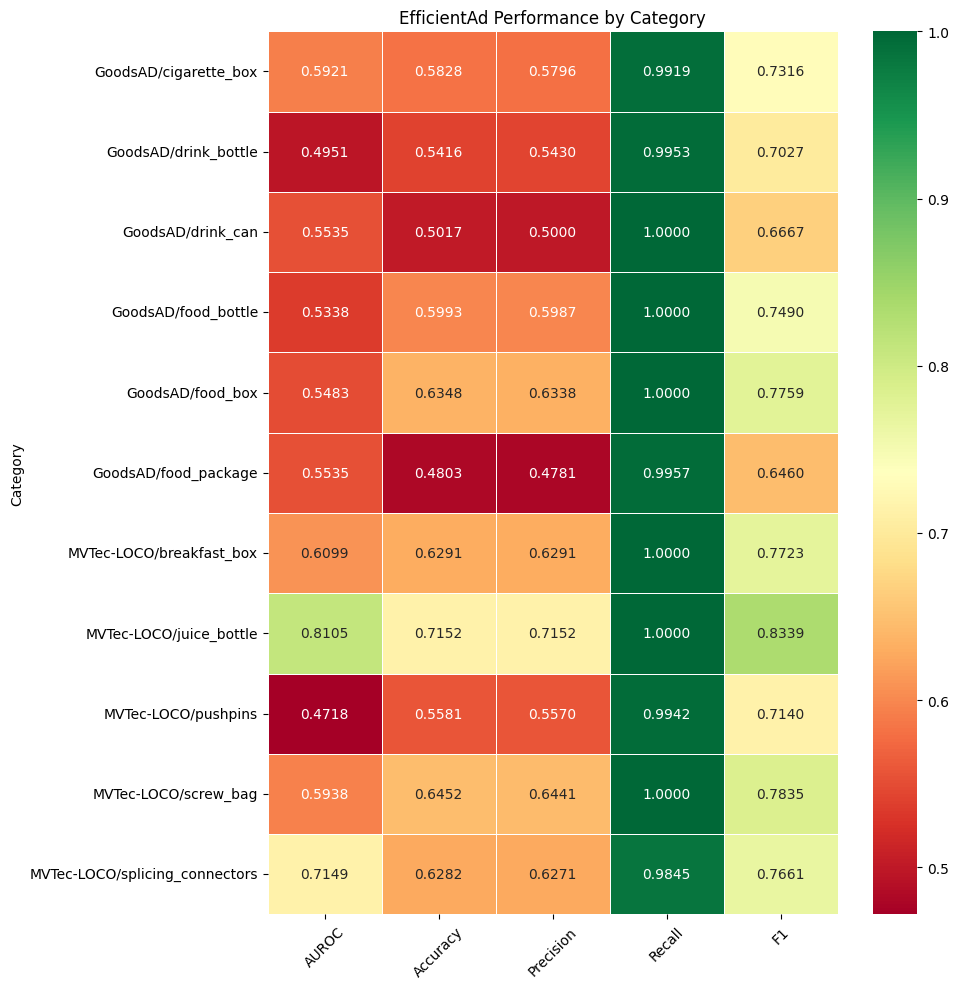

<Axes: title={'center': 'EfficientAd Performance by Category'}, ylabel='Category'>

In [ ]:
from src.visual.plot import heatmap_plot

metrics_trans = metrics_df.drop('Average').drop(columns='N_samples')
heatmap_plot(
    metrics_trans,
    figsize=(10, 10),
    cmap='RdYlGn',
    annot=True,
    fmt='.4f',
    linewidths=0.5,
    title='EfficientAd Performance by Category',
    rotation_x=45,
    rotation_y=0
)

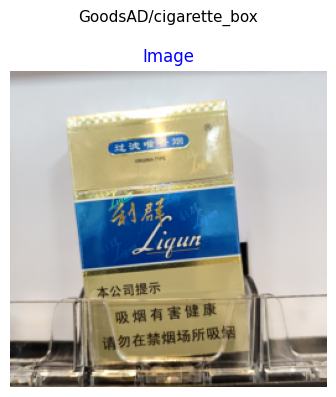

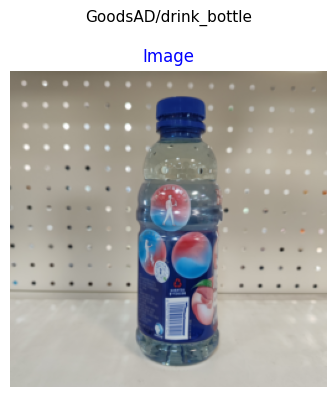

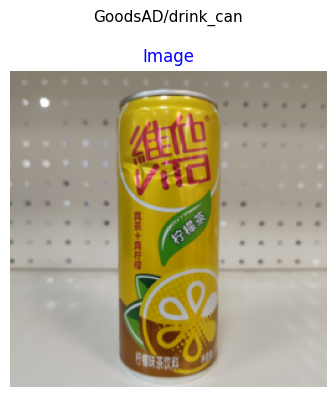

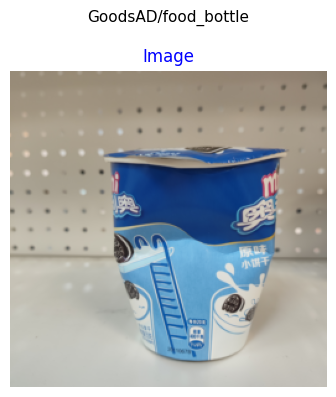

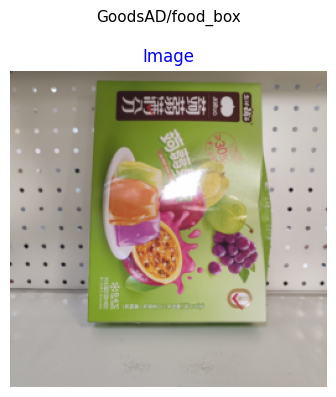

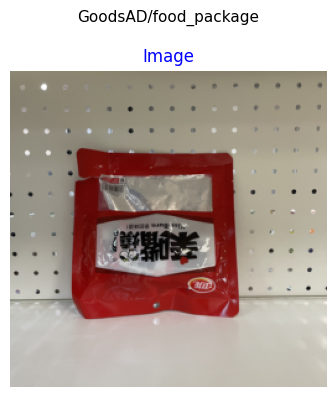

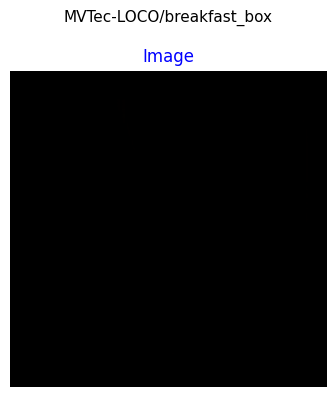

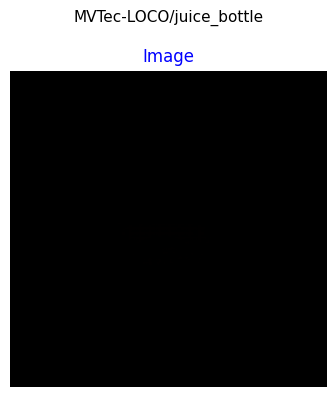

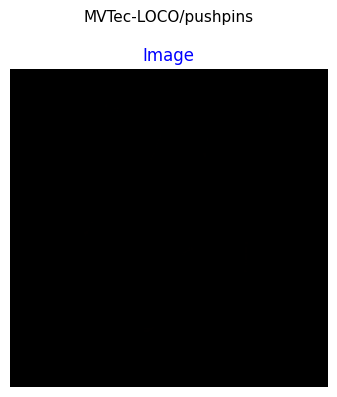

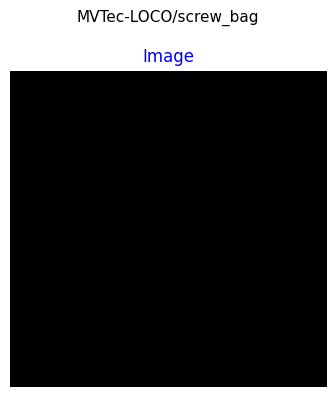

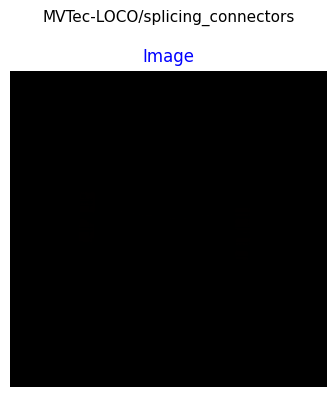

In [ ]:
from src.visual.plot import visualize_prediction

for category, batches in predictions.items():
    if not batches:
        continue

    batch = batches[0]  # 첫 batch
    visualize_prediction(
        batch=batch,
        idx=0,           # batch 내 첫 이미지
        title=category
    )

### Resume training

In [ ]:
config

In [ ]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
runner.fit_all()